In [1]:
# !pip install xgboost

In [2]:
import numpy as np;
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics


In [3]:
df = pd.read_csv("Mastercard_stock_history.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2006-05-25,3.748967,4.283869,3.739664,4.279217,395343000,0.0,0.0
1,2006-05-26,4.307126,4.348058,4.103398,4.179680,103044000,0.0,0.0
2,2006-05-30,4.183400,4.184330,3.986184,4.093164,49898000,0.0,0.0
3,2006-05-31,4.125723,4.219679,4.125723,4.180608,30002000,0.0,0.0
4,2006-06-01,4.179678,4.474572,4.176887,4.419686,62344000,0.0,0.0


In [4]:
df.shape

(3872, 8)

In [5]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,3872.000000,3872.000000,3872.000000,3872.000000,3.872000e+03,3872.000000,3872.000000
mean,104.896814,105.956054,103.769349,104.882714,1.232250e+07,0.002329,0.002583
std,106.245511,107.303589,105.050064,106.168693,1.759665e+07,0.025851,0.160706
min,3.748967,4.102467,3.739664,4.083861,6.411000e+05,0.000000,0.000000
25%,22.347203,22.637997,22.034458,22.300391,3.529475e+06,0.000000,0.000000
50%,70.810079,71.375896,70.224002,70.856083,5.891750e+06,0.000000,0.000000
75%,147.688448,148.645373,146.822013,147.688438,1.319775e+07,0.000000,0.000000
max,392.653890,400.521479,389.747812,394.685730,3.953430e+08,0.440000,10.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3872 entries, 0 to 3871
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3872 non-null   object 
 1   Open          3872 non-null   float64
 2   High          3872 non-null   float64
 3   Low           3872 non-null   float64
 4   Close         3872 non-null   float64
 5   Volume        3872 non-null   int64  
 6   Dividends     3872 non-null   float64
 7   Stock Splits  3872 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 242.1+ KB


# EDA

Text(0, 0.5, 'Price in dollars')

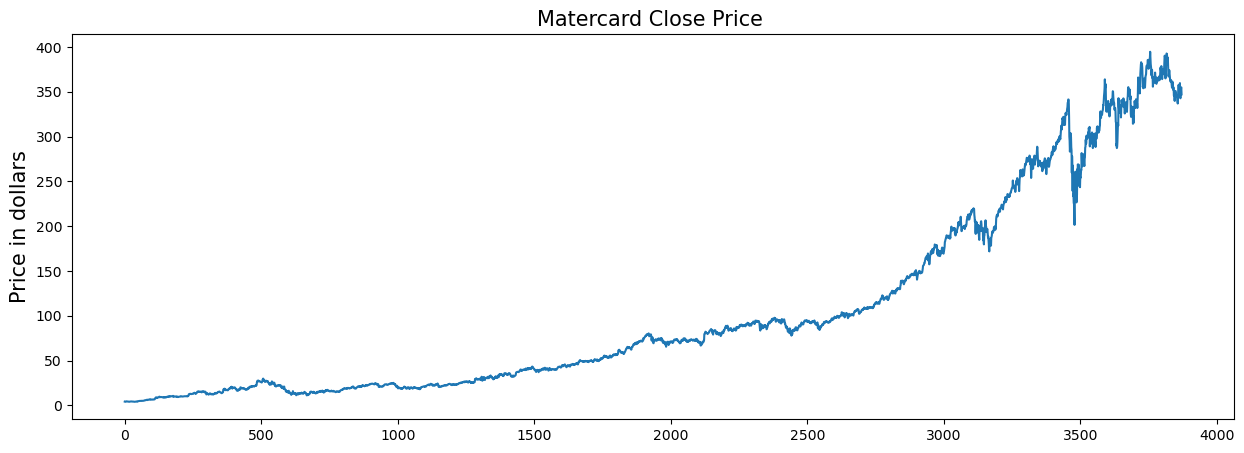

In [7]:
plt.figure(figsize = (15,5))
plt.plot(df["Close"])
plt.title("Matercard Close Price ", fontsize = 15)
plt.ylabel("Price in dollars", fontsize = 15)

# Checking if null value is present in our dataset

In [8]:
df.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

# Distribution plot for features 

In [9]:
%matplotlib inline

In [10]:
df = df.drop(['Dividends'], axis = 1)
df = df.drop(['Stock Splits'], axis = 1)

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'Volume'}>, <Axes: >]], dtype=object)

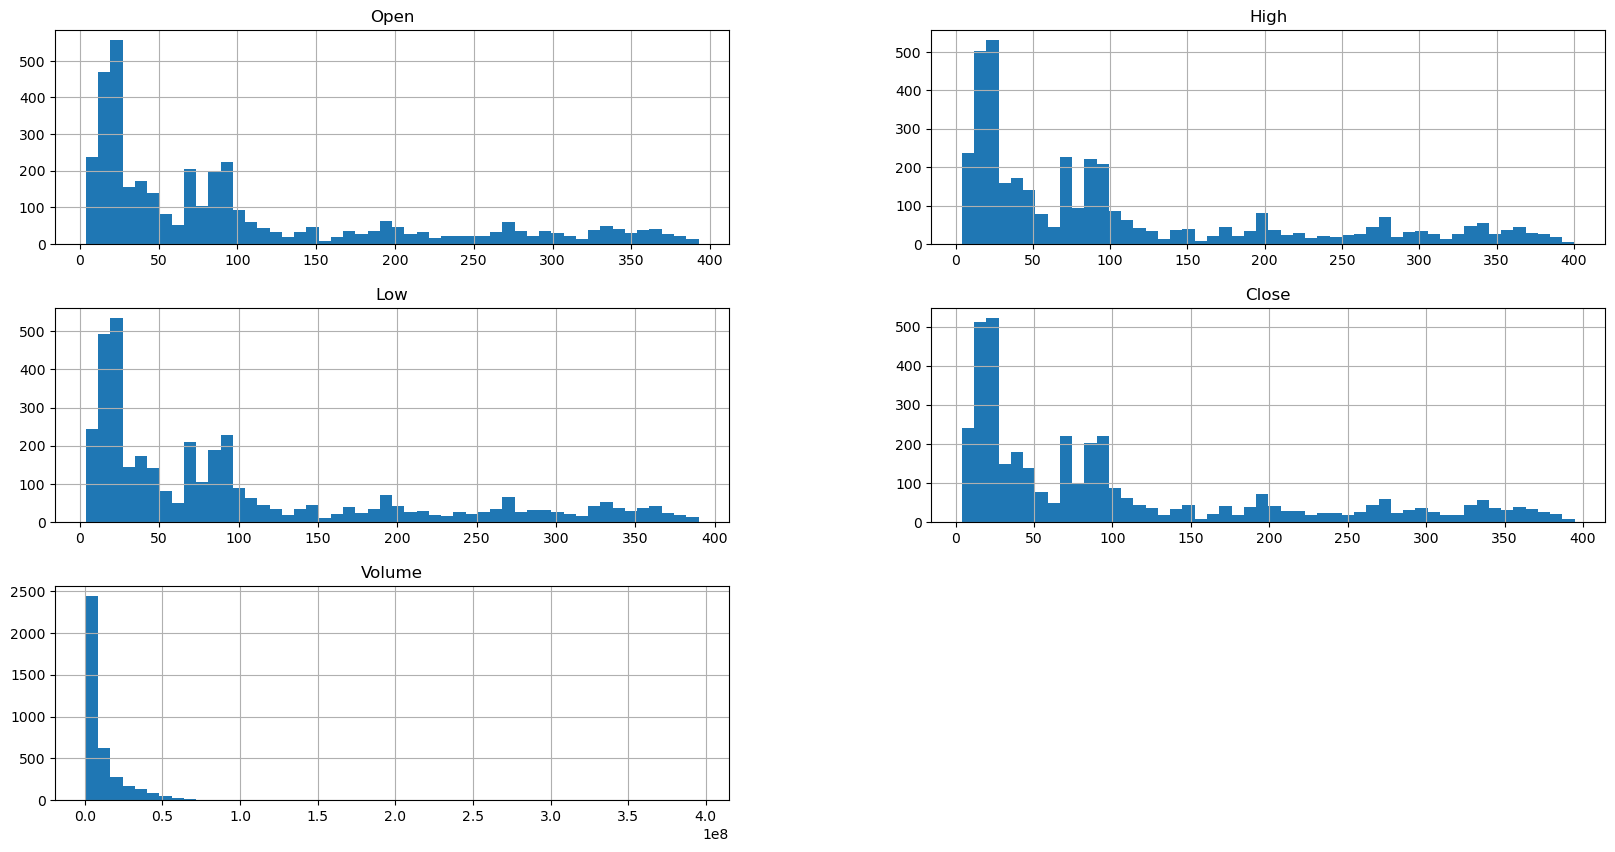

In [11]:
df.hist(bins = 50, figsize = (20,10))

# Feature Engineering

In [12]:
splitted = df['Date'].str.split('-',expand = True)
df['day'] = splitted[2].astype('int')
df['month'] = splitted[1].astype('int')
df['year'] = splitted[0].astype('int')
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year
0,2006-05-25,3.748967,4.283869,3.739664,4.279217,395343000,25,5,2006
1,2006-05-26,4.307126,4.348058,4.103398,4.179680,103044000,26,5,2006
2,2006-05-30,4.183400,4.184330,3.986184,4.093164,49898000,30,5,2006
3,2006-05-31,4.125723,4.219679,4.125723,4.180608,30002000,31,5,2006
4,2006-06-01,4.179678,4.474572,4.176887,4.419686,62344000,1,6,2006


In [13]:
df['isQuarter_end'] = np.where(df['month']%3 == 0, 1, 0)
df.head()
df.dtypes

Date              object
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
day                int32
month              int32
year               int32
isQuarter_end      int32
dtype: object

C:\Users\disha\AppData\Local\Temp\ipykernel_22728\1270320799.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i+1)


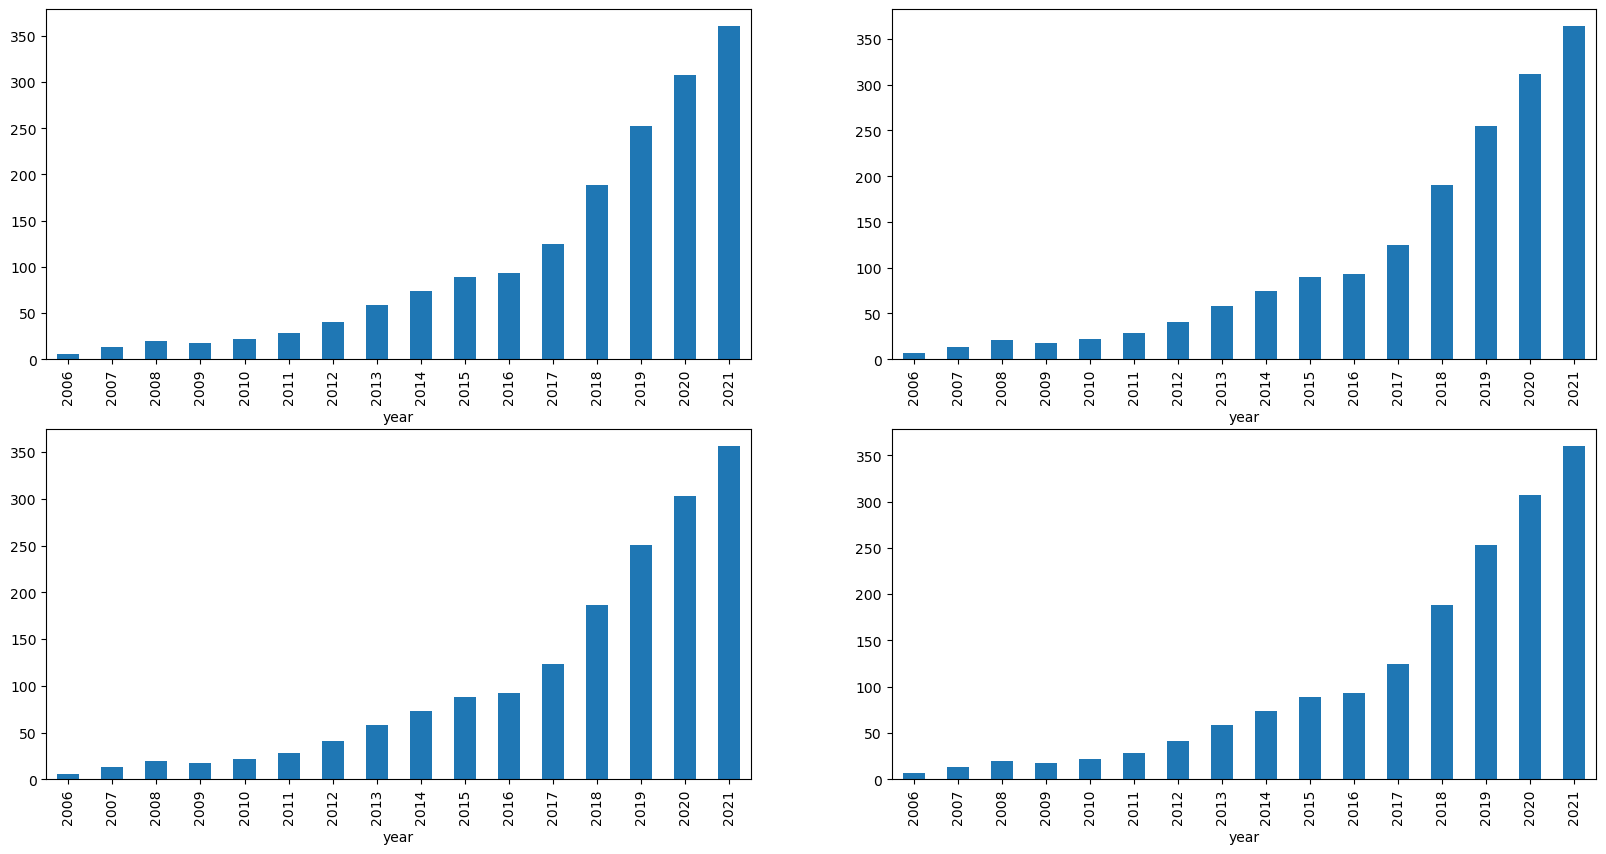

In [29]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize = (20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2, 2, i+1)
    data_grouped[col].plot.bar()

plt.show()

In [30]:
df.groupby('isQuarter_end').mean()

,Open,High,Low,Close,Volume,day,month,year,open-close,low-high,target
isQuarter_end,,,,,,,,,,,
0,104.700383,105.739207,103.611232,104.717884,1.260384e+07,15.750879,6.125732,2013.620461,-0.017502,-2.127975,0.544319
1,105.280538,106.379659,104.078225,105.204705,1.177291e+07,15.740656,7.439359,2013.512586,0.075833,-2.301434,0.532418


In [16]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

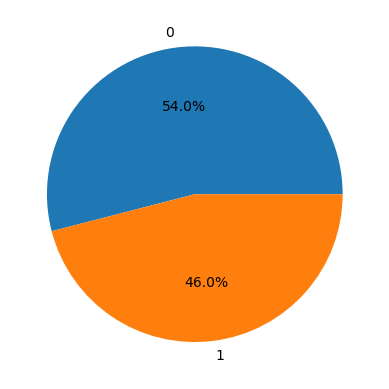

In [17]:
plt.pie(df['target'].value_counts().values, 
       labels = [0,1], autopct = '%1.1f%%')
plt.show()

In [18]:
df = df.drop(['Date'], axis = 1)


# Correlation

<Axes: >

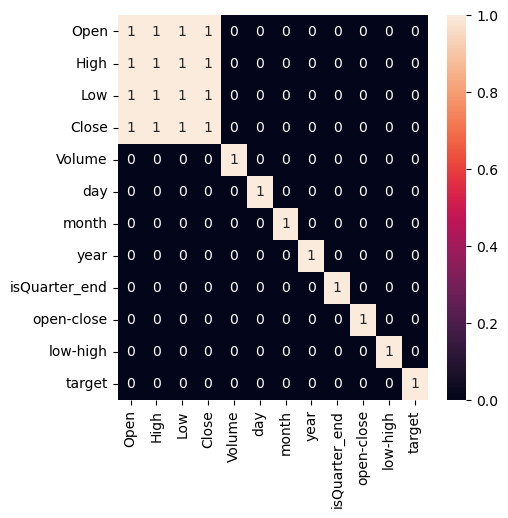

In [19]:
plt.figure(figsize = (5,5))
sb.heatmap(df.corr() > 0.9, annot = True,cbar = True)

# Data Splitting and Normalization

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    ('std_scaler', StandardScaler()),
])

features = df[['open-close', 'low-high', 'isQuarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_test, Y_train, Y_test = train_test_split(features,target, test_size = 0.2, random_state = 2022)
print(X_train.shape, X_test.shape)

(3097, 3) (775, 3)


# Model Development and Evalution

In [21]:
models = [LogisticRegression(), SVC( kernel = 'poly', probability = True), XGBClassifier()]

for i in range(3):
    models[i].fit(X_train, Y_train)
    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
    print('Validation Accurancy : ',metrics.roc_auc_score(Y_test, models[i].predict_proba(X_test)[:,1]))
    print()

LogisticRegression() : 
Training Accuracy :  0.5154847430662888
Validation Accurancy :  0.5358006773101114

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.48336404354473034
Validation Accurancy :  0.4902367897650917

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Traini

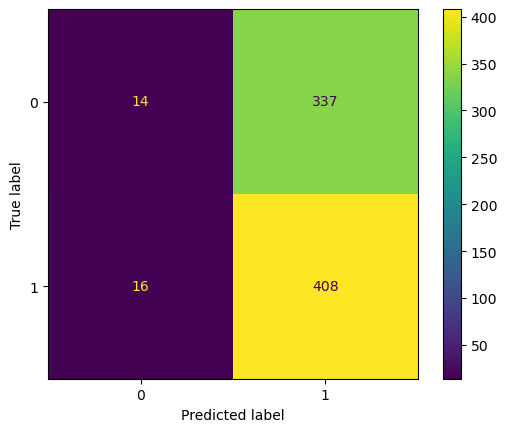

In [34]:
# model = XGBClassifier()
model = LogisticRegression()
# model = SVC(kernel = 'poly', probability = True)
clf = SVC(random_state = 0)
clf.fit(X_train, Y_train)
metrics.ConfusionMatrixDisplay.from_estimator(clf, X_test,Y_test)
